In [1]:
import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

font = "NanumPen"
font_path = "%s.ttf" % font

icon = "airbnb-logo" 
icon_path = "%s.png" % icon

### 데이터 입력

In [3]:
# 좋은 후기

f = open( "AirBnB_reviews.txt", "r")
message_of_ab = f.read()
print(message_of_ab)
f.close()

깨끗한 게스트하우스 실내와 주변의 시끄러운 소음도 생각보다 없었으며, 밖에 나가면 바로 옆 편의점도 있고 조금만 더 나가면 음식점과 가게들도 많아서 좋았습니다


위치가 홍대 입구역 바로 근처라 너무 좋았어요! 수건도 많이 준비되어있었고 생수도 준비해주셨고 무엇보다 방이 너무 따듯해서 요즘같은 날씨에 최고였어요~ 다음에 꼭 또 이용하고 싶은 숙소 였습니다=)


빠른 응답과 친절한 설명에 너무 좋았습니다. 나중에 또 묵고 싶을 정도네요!^^ 숙소 위치도 역과 근접해서 너무 편했습니다~


너무 괜찮았어요! 건물이 낡아서 걱정했는데 들어가보면 완전 딴판입니다 물론 주변이 밤이 되면 살짝 무섭고 시끄럽긴 해도 완전 만족입니다


호스트 분이 일단 너무너무 좋았습니다. 친절하게 답변도 하나하나 빠르게 해주셔서 너무너무 좋았습니다. 호스트 분 만큼 숙소 또한 깔끔하고 깨끗하였습니다. 다음에도 홍대에서 놀 일이 생기면 꼭 다시 머물고 싶은 숙소입니다~ 좋은 숙소에서 잘 쉬다 갑니당 후회 안하실 숙소에욤!!


너무 잘묵고 갑니다. 편하고 숙소가 넓고 아늑하고 정말 좋았어요. 역이랑도 가깝고 이동하기에도 편했습니다


무엇보다 역에서 멀지 않다는 점이 좋았고 건물외관은 조금 오래?記뼉 모르겠지만 숙소에 들어갔을때 너무 예쁘고 깔끔해서 좋았습니다! 메세지 답도 빠르게 해주십니다 다음에도 또 묶고 싶은곳이에요 :)


일단 접근성도 너무 좋구! 바로앞에 공원이 있어서 산책하기도 좋았어요!! 수건도 넉넉히 주셔서 부족함없이 잘사용했구요:) 무엇보다도 호스트님의 배려가 너무너무 느껴지는 공간이었어요!!


위치가너무좋고 깨끗하고 좋았아요:)


홍대 번화가랑 완전 가깝고 사진그대로 깔끔합니다! 호스트분도 친절하고 잘 쉬다 왔어요! 건물자체는 상당히 낡아서 걱정했는데 편하게 쉬다왔습니다:)


11시까지 나가야되는데 12시에 나가도된다고해서 감사드리고 가격대비 좋은 숙소였습니다


깔끔하고 좋은 곳에 위치해있어요 서울역 - 공항 모두 이용할 수 있는 7번출구 근처고 경춘선 탈 

In [4]:
# 후기 좋은 숙소 전처리
message_of_ab = message_of_ab.split('\n\n')
message_of_ab

['깨끗한 게스트하우스 실내와 주변의 시끄러운 소음도 생각보다 없었으며, 밖에 나가면 바로 옆 편의점도 있고 조금만 더 나가면 음식점과 가게들도 많아서 좋았습니다',
 '\n위치가 홍대 입구역 바로 근처라 너무 좋았어요! 수건도 많이 준비되어있었고 생수도 준비해주셨고 무엇보다 방이 너무 따듯해서 요즘같은 날씨에 최고였어요~ 다음에 꼭 또 이용하고 싶은 숙소 였습니다=)',
 '\n빠른 응답과 친절한 설명에 너무 좋았습니다. 나중에 또 묵고 싶을 정도네요!^^ 숙소 위치도 역과 근접해서 너무 편했습니다~',
 '\n너무 괜찮았어요! 건물이 낡아서 걱정했는데 들어가보면 완전 딴판입니다 물론 주변이 밤이 되면 살짝 무섭고 시끄럽긴 해도 완전 만족입니다',
 '\n호스트 분이 일단 너무너무 좋았습니다. 친절하게 답변도 하나하나 빠르게 해주셔서 너무너무 좋았습니다. 호스트 분 만큼 숙소 또한 깔끔하고 깨끗하였습니다. 다음에도 홍대에서 놀 일이 생기면 꼭 다시 머물고 싶은 숙소입니다~ 좋은 숙소에서 잘 쉬다 갑니당 후회 안하실 숙소에욤!!',
 '\n너무 잘묵고 갑니다. 편하고 숙소가 넓고 아늑하고 정말 좋았어요. 역이랑도 가깝고 이동하기에도 편했습니다',
 '\n무엇보다 역에서 멀지 않다는 점이 좋았고 건물외관은 조금 오래?記뼉\x1a 모르겠지만 숙소에 들어갔을때 너무 예쁘고 깔끔해서 좋았습니다! 메세지 답도 빠르게 해주십니다 다음에도 또 묶고 싶은곳이에요 :)',
 '\n일단 접근성도 너무 좋구! 바로앞에 공원이 있어서 산책하기도 좋았어요!! 수건도 넉넉히 주셔서 부족함없이 잘사용했구요:) 무엇보다도 호스트님의 배려가 너무너무 느껴지는 공간이었어요!!',
 '\n위치가너무좋고 깨끗하고 좋았아요:)',
 '\n홍대 번화가랑 완전 가깝고 사진그대로 깔끔합니다! 호스트분도 친절하고 잘 쉬다 왔어요! 건물자체는 상당히 낡아서 걱정했는데 편하게 쉬다왔습니다:)',
 '\n11시까지 나가야되는데 12시에 나가도된다고해서 감사드리고 가격대비 좋은 숙소였습니다',
 '\n깔끔하고 

In [5]:
# 좋은 후기 빈도 계산

tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_ab)
tf_bow1 = tf_vectorizer.fit_transform(message_of_ab)
tf_bow1

<60x876 sparse matrix of type '<class 'numpy.int64'>'
	with 1293 stored elements in Compressed Sparse Row format>

In [6]:
# 좋은 후기 

print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

876
876


['10분거리에',
 '11시까지',
 '12시에',
 '1박',
 '1번출구랑',
 '1번출구에서',
 '2일을',
 '5개',
 '7번',
 '7번출구',
 '8인분이',
 'airbnb',
 'by',
 'egg도',
 'hidden',
 'host분도',
 'sns인스타',
 'ㅎㅎ',
 '記뼉',
 '가게들도',
 '가격과',
 '가격대비',
 '가까운',
 '가까운곳에',
 '가까워',
 '가까워서',
 '가깝고',
 '가깝습니다',
 '가는',
 '가도',
 '가봤던',
 '가스레인지',
 '가족',
 '가지고',
 '각침대마다',
 '감사드리고',
 '감사하고',
 '감사합니다',
 '감탄했습니다',
 '갑니다',
 '갑니당',
 '갔던',
 '갔습니다',
 '갖다주셔서',
 '같아요',
 '같은것도',
 '같이',
 '같이간',
 '개조한느낌이라',
 '객실은',
 '거슬리는',
 '거실에도',
 '걱정했는데',
 '건물외관은',
 '건물이',
 '건물자체는',
 '걸어가서',
 '걸어나가면',
 '걸어서',
 '것도',
 '것보다',
 '것이',
 '게스트하우스',
 '겨울',
 '경우',
 '경의중앙도',
 '경춘선',
 '계시는구나',
 '고생했던',
 '고스란히',
 '골목만',
 '골목이라',
 '곳도',
 '곳에',
 '곳은',
 '곳입니다',
 '공간도',
 '공간이었어요',
 '공연도',
 '공원에서',
 '공원이',
 '공항',
 '과장된것이',
 '괜찮았어요',
 '굉장히',
 '교통도',
 '구비되어',
 '구비시설도',
 '구비시설에',
 '구조로',
 '국회의사당까지',
 '그대로',
 '그런지',
 '그렇다고',
 '그리고',
 '그자체였어요',
 '근접성이',
 '근접해서',
 '근처',
 '근처가',
 '근처고',
 '근처네요',
 '근처라',
 '근처라서',
 '근처에',
 '근처에서',
 '금방사라졌습니다',
 '기분',
 '기분이',
 '기분좋게',
 '기억이',
 '기차',
 '기회가',
 '길가에',
 '길

In [7]:
# 좋은 후기 
# frequency count

tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['10분거리에', '11시까지', '12시에', '1박', '1번출구랑', '1번출구에서', '2일을', '5개', '7번', '7번출구', '8인분이', 'airbnb', 'by', 'egg도', 'hidden', 'host분도', 'sns인스타', 'ㅎㅎ', '記뼉', '가게들도', '가격과', '가격대비', '가까운', '가까운곳에', '가까워', '가까워서', '가깝고', '가깝습니다', '가는', '가도', '가봤던', '가스레인지', '가족', '가지고', '각침대마다', '감사드리고', '감사하고', '감사합니다', '감탄했습니다', '갑니다', '갑니당', '갔던', '갔습니다', '갖다주셔서', '같아요', '같은것도', '같이', '같이간', '개조한느낌이라', '객실은', '거슬리는', '거실에도', '걱정했는데', '건물외관은', '건물이', '건물자체는', '걸어가서', '걸어나가면', '걸어서', '것도', '것보다', '것이', '게스트하우스', '겨울', '경우', '경의중앙도', '경춘선', '계시는구나', '고생했던', '고스란히', '골목만', '골목이라', '곳도', '곳에', '곳은', '곳입니다', '공간도', '공간이었어요', '공연도', '공원에서', '공원이', '공항', '과장된것이', '괜찮았어요', '굉장히', '교통도', '구비되어', '구비시설도', '구비시설에', '구조로', '국회의사당까지', '그대로', '그런지', '그렇다고', '그리고', '그자체였어요', '근접성이', '근접해서', '근처', '근처가', '근처고', '근처네요', '근처라', '근처라서', '근처에', '근처에서', '금방사라졌습니다', '기분', '기분이', '기분좋게', '기억이', '기차', '기회가', '길가에', '길치인', '깃들어져', '깊숙이', '깔끔하게', '깔끔하고', '깔끔하네요', '깔끔한', '깔끔한인테리어에', '깔끔합니다', '깔끔해서', '깔끔해요', '깨끗하게청소되어지고', '깨끗하고', '깨끗

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  1,  1,  1,  2,  1,  1,  1,  5,  5,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  6,  1,  1,  1,  1,  3,  2,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,
        3,  1,  1,  1,  1,  1,  1,  2,  1,  6,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  2,  7,
        1,  1,  1,  2,  5,  1,  1, 14,  1,  4,  1,  3,  1,  1,  2,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  2,  1,  1,  1,  2,  1,  1,  2,  1,  1, 33,  1,  3,  1,  3,
        1,  1,  2,  1,  7,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  4,  2,  1,  7,
        3,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  3,  1

In [8]:
# 좋은 후기
# 단어별 글자수 확인
tf_word_dict1

{'10분거리에': 1,
 '11시까지': 1,
 '12시에': 1,
 '1박': 1,
 '1번출구랑': 1,
 '1번출구에서': 1,
 '2일을': 1,
 '5개': 1,
 '7번': 1,
 '7번출구': 1,
 '8인분이': 1,
 'airbnb': 1,
 'by': 1,
 'egg도': 1,
 'hidden': 1,
 'host분도': 1,
 'sns인스타': 1,
 'ㅎㅎ': 2,
 '記뼉': 1,
 '가게들도': 1,
 '가격과': 1,
 '가격대비': 2,
 '가까운': 1,
 '가까운곳에': 1,
 '가까워': 1,
 '가까워서': 5,
 '가깝고': 5,
 '가깝습니다': 1,
 '가는': 1,
 '가도': 1,
 '가봤던': 1,
 '가스레인지': 1,
 '가족': 1,
 '가지고': 1,
 '각침대마다': 1,
 '감사드리고': 1,
 '감사하고': 1,
 '감사합니다': 1,
 '감탄했습니다': 1,
 '갑니다': 6,
 '갑니당': 1,
 '갔던': 1,
 '갔습니다': 1,
 '갖다주셔서': 1,
 '같아요': 3,
 '같은것도': 2,
 '같이': 1,
 '같이간': 1,
 '개조한느낌이라': 1,
 '객실은': 1,
 '거슬리는': 1,
 '거실에도': 1,
 '걱정했는데': 2,
 '건물외관은': 1,
 '건물이': 1,
 '건물자체는': 1,
 '걸어가서': 1,
 '걸어나가면': 1,
 '걸어서': 1,
 '것도': 1,
 '것보다': 1,
 '것이': 2,
 '게스트하우스': 1,
 '겨울': 1,
 '경우': 1,
 '경의중앙도': 1,
 '경춘선': 1,
 '계시는구나': 1,
 '고생했던': 1,
 '고스란히': 1,
 '골목만': 1,
 '골목이라': 1,
 '곳도': 1,
 '곳에': 2,
 '곳은': 1,
 '곳입니다': 1,
 '공간도': 1,
 '공간이었어요': 1,
 '공연도': 1,
 '공원에서': 1,
 '공원이': 1,
 '공항': 1,
 '과장된것이': 1,
 '괜찮았어요': 1,
 '굉장히': 5,
 

### 시각화

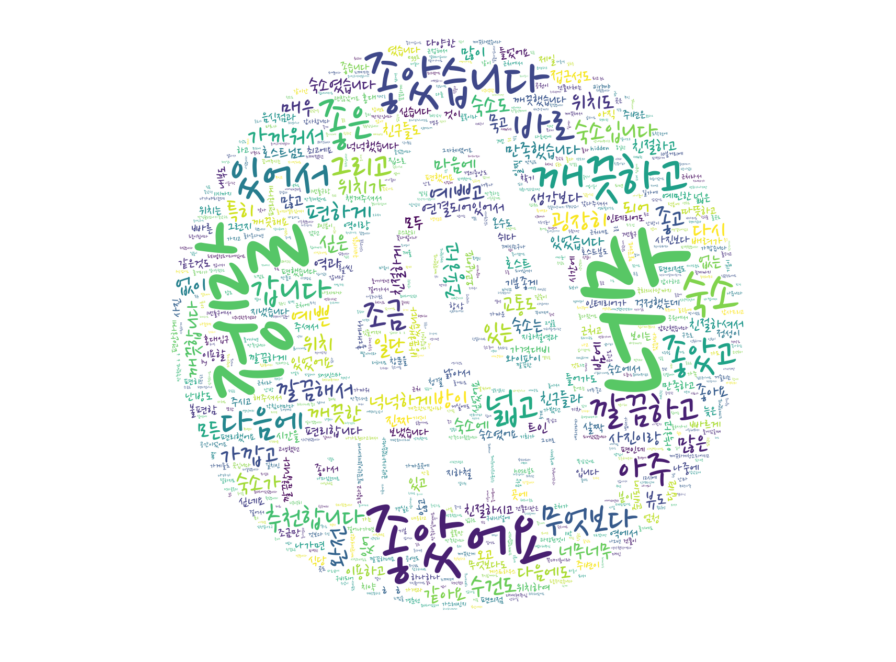

In [9]:
# 좋은 후기 워드 클라우드
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(15, 45))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("AirBnb_review.png") # 그림파일로 추출하기

### 결과

- 조사를 제외하고 좋은 후기들 중 가장 빈번하게 사용된 단어는 '좋았어요'. '좋았습니다', '깨끗하고' 등이었다. 